In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [8]:
!pip install dill
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [28]:
import pandas as pd
import numpy as np
import dill
import matplotlib.pyplot as plt
import logging

plt.style.use("ggplot")

In [67]:
#keys = [' Allergy / Immunology', ' Autopsy', ' Bariatrics', ' Cardiovascular / Pulmonary', ' Chiropractic', ' Consult - History and Phy.', ' Cosmetic / Plastic Surgery', ' Dentistry', ' Dermatology', ' Diets and Nutritions', ' Discharge Summary', ' Emergency Room Reports', ' Endocrinology', ' ENT - Otolaryngology', ' Gastroenterology', ' General Medicine', ' Hematology - Oncology', ' Hospice - Palliative Care', ' IME-QME-Work Comp etc.', ' Lab Medicine - Pathology', ' Letters', ' Nephrology', ' Neurology', ' Neurosurgery', ' Obstetrics / Gynecology', ' Office Notes', ' Ophthalmology', ' Orthopedic', ' Pain Management', ' Pediatrics - Neonatal', ' Physical Medicine - Rehab', ' Podiatry', ' Psychiatry / Psychology', ' Radiology', ' Rheumatology', ' Sleep Medicine', ' SOAP / Chart / Progress Notes', ' Speech - Language', ' Surgery', ' Urology']
# Shortened category names
keys = ['Allergy', 'Autopsy', 'Bariatrics', 'Pulmonary', 'Chiropractic', 'Consult', 'Cosmetic', 'Dentistry', 'Dermatology', 
        'Nutrition', 'Discharge', 'ER Reports', 'Endocrinology', 'ENT', 'Gastroenterology', 'General Med', 'Hematology', 
        'Hospice', 'IME', 'Lab Med', 'Letters', 'Nephrology', 'Neurology', 'Neurosurgery', 'Obstetrics', 'Office Notes', 
        'Ophthalmology', 'Orthopedic', 'Pain Management', 'Pediatrics', 'Physical Med.', 'Podiatry', 'Psychiatry', 'Radiology', 
        'Rheumatology', 'Sleep Med', 'SOAP', 'Language', 'Surgery', 'Urology']

keys = np.array(keys)

In [9]:
names = ["electra", "medelectra", "roberta", "distilled_roberta", "biobert"]
results_info = ["result", "model_outputs", "wrong_predictions"]
base_dir = "/content/drive/MyDrive/472 Project Files/eval_results"
results = dict(
    zip(names, 
        [dict(zip(results_info,
             pd.read_pickle(f"{base_dir}/eval_{name}.pkl")))
        for name in names]
    ))

In [68]:
results["electra"]["wrong_predictions"][:20]

[{'guid': 0, 'text_a': ',LUNGS:  Severe inspiratory and expiratory wheezing heard throughout the lung fields', 'text_b': None, 'label': 25},
 {'guid': 1, 'text_a': 'ANESTHESIA:  ,General', 'text_b': None, 'label': 24},
 {'guid': 2, 'text_a': 'She will require one to two more physical therapy to help regain motion and strength to the lower extremity.', 'text_b': None, 'label': 38},
 {'guid': 3, 'text_a': 'Motor: unremarkable', 'text_b': None, 'label': 33},
 {'guid': 4, 'text_a': 'They recommended Aloe Vesta foam and Silver gel to the area topically', 'text_b': None, 'label': 10},
 {'guid': 5, 'text_a': 'Continue Lexapro 20 mg p.o', 'text_b': None, 'label': 32},
 {'guid': 6, 'text_a': 'Positive patellar grind test', 'text_b': None, 'label': 27},
 {'guid': 7, 'text_a': 'Her most recent Pap smear was normal', 'text_b': None, 'label': 38},
 {'guid': 8, 'text_a': 'If she remains stable, the right common femoral artery and vein sheaths will be removed and manual pressure will be applied for h

## Analysis

In [11]:
el, me = results["electra"]["model_outputs"], results["medelectra"]["model_outputs"]

## Similarities

In [ ]:
dist = np.zeros((5,5))
for i, model1 in enumerate(names):
  for j, model2 in enumerate(names):
    a, b = results[model1]["model_outputs"], results[model2]["model_outputs"]
    dist[i,j] = np.linalg.norm(a - b)
pd.DataFrame(dist, names, names)

### Histograms

In [ ]:
df_base = pd.read_csv("/content/drive/MyDrive/472 Project Files/Stratified Input Data/eval_df-3.csv")

In [74]:
labels, counts = np.unique(df_base['label'], return_counts=True)
#print(labels, counts)
sorted_inds = np.argsort(counts)[::-1]
labels, counts = labels[sorted_inds], counts[sorted_inds]
cats = keys[labels]
print(cats)
print(counts) 

['Surgery' 'Consult' 'Orthopedic' 'Pulmonary' 'General Med' 'Neurology'
 'Gastroenterology' 'Radiology' 'Obstetrics' 'SOAP' 'Urology' 'ER Reports'
 'Discharge' 'Neurosurgery' 'Psychiatry' 'ENT' 'Hematology' 'Nephrology'
 'Pediatrics' 'Ophthalmology' 'Podiatry' 'Office Notes' 'IME'
 'Pain Management' 'Dentistry' 'Dermatology' 'Chiropractic' 'Cosmetic'
 'Endocrinology' 'Letters' 'Physical Med.' 'Autopsy' 'Sleep Med'
 'Rheumatology' 'Hospice' 'Allergy' 'Nutrition' 'Bariatrics' 'Language'
 'Lab Med']
[8018 5463 3058 2778 2517 1891 1408 1350 1255 1132  848  820  808  767
  668  661  654  628  625  463  335  313  246  217  206  205  202  198
  180  167  147  147   97   87   64   56   55   48   43   31]


In [196]:
def plot_histogram(labels, counts, show_top=40, ax=None, **kwargs):
    if not ax: ax = plt.gca()
    if "title" in kwargs: ax.set_title(kwargs["title"]); kwargs.pop("title")
    no_show_x = kwargs["no_show_x"] if ("no_show_x" in kwargs) else False

    if "no_show_x" in kwargs: kwargs.pop("no_show_x")

    ax.bar(labels[:show_top], counts[:show_top], align='center', **kwargs)
    if no_show_x:
        ax.set_xticks([])
    else:
        ax.set_xticks(labels[:show_top])
        #ax.set_xticklabels(labels, rotation=45, ha='right')
        ax.set_xticklabels(labels[:show_top], rotation=90)
    ax.grid(axis="x")
    ax.set_ylim(0,17.5) #Hardcoded :/

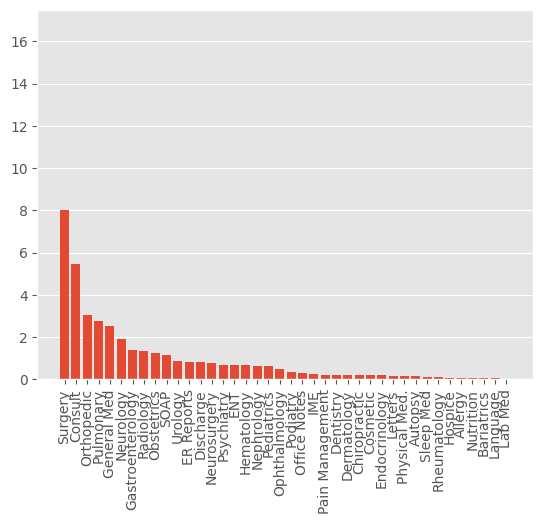

In [197]:
plot_histogram(cats, counts/1000)

In [199]:
def plot_data_counts(ndarr, label_order, show_top=40, ax=None, **kwargs):
    classes = np.apply_along_axis(np.argmax, 1, ndarr)
    #classes = keys[classes]
    #plt.hist(classes)
    #plt.xticks(rotation=45, ha='right')

    label_mapping = np.argsort(label_order)
    labels, counts = np.unique(classes, return_counts=True)

    # Insert counts into new structure in proper order & locations
    new_counts = np.zeros(40, dtype=int)
    #print(keys[labels], counts, sep="\n")
    new_counts[label_mapping[labels]] = counts
    #print(label_order[:show_top], new_counts[:show_top], sep="\n")

    # Scale down by a factor of 1000 (not a good way to do this)
    new_counts = new_counts / 1000

    cats = keys[label_order]
    plot_histogram(cats, new_counts, show_top=show_top, ax=ax, **kwargs)

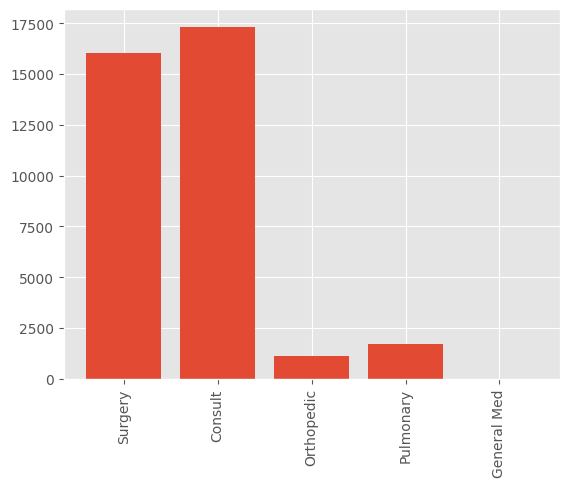

In [154]:
plot_data_counts(el, labels, show_top=5)

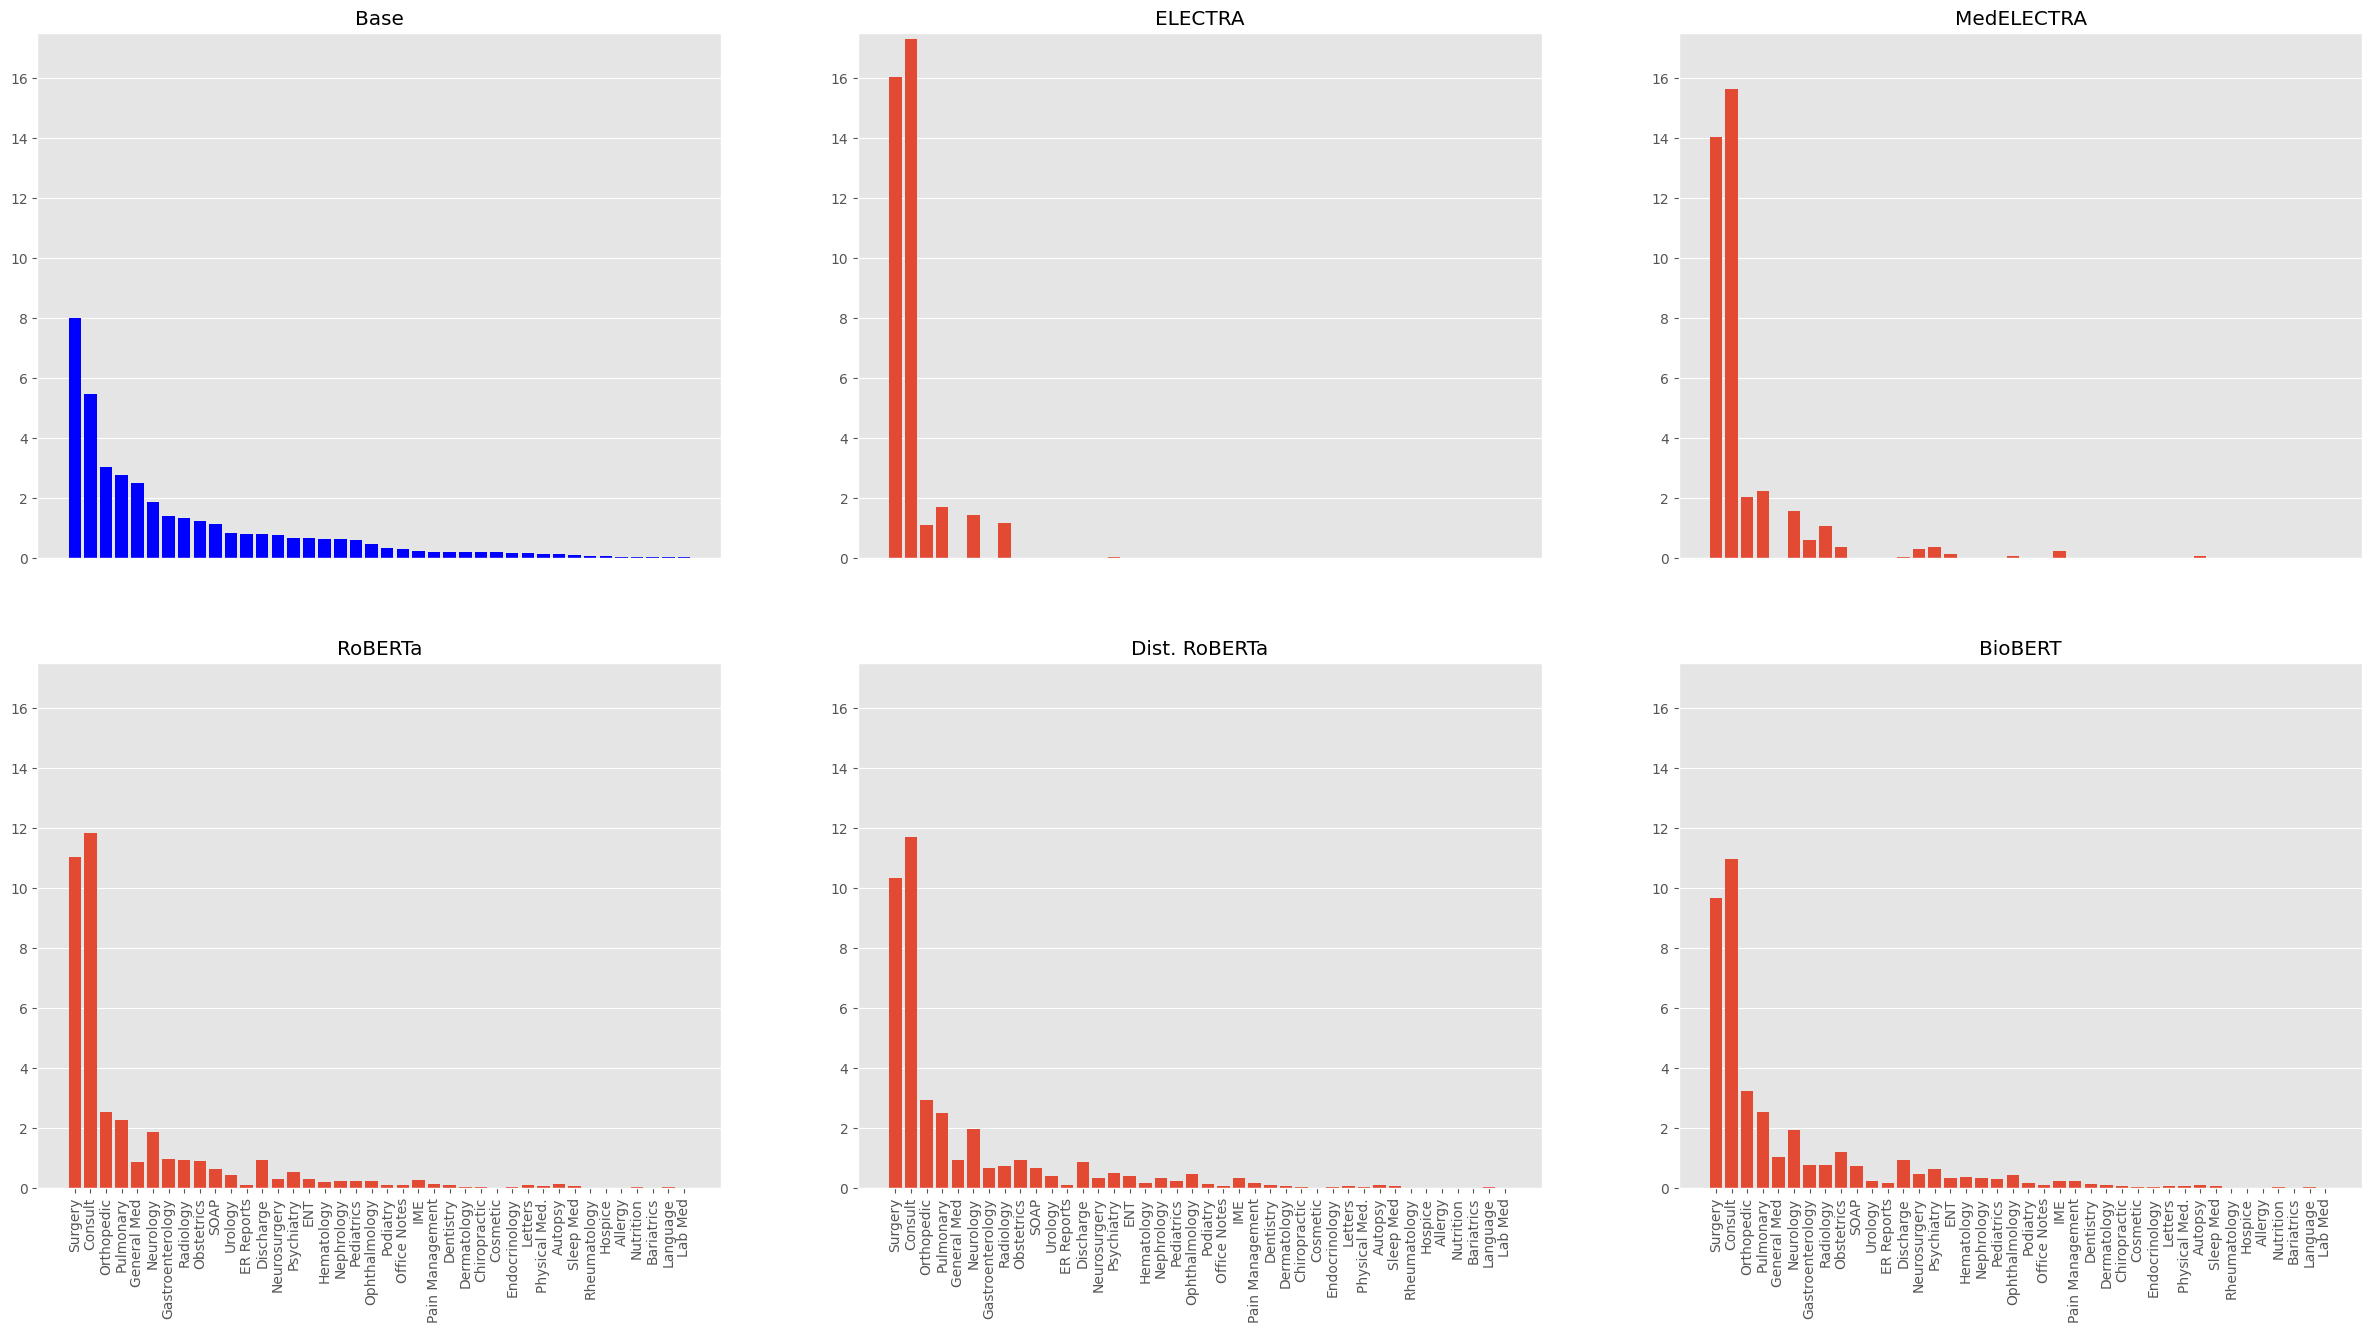

In [208]:
show_top = 40
fig, axs = plt.subplots(2,3,figsize=(30,15))

# first plot is the base data distribution
plot_histogram(cats, counts/1000, ax=fig.axes[0], 
               show_top=show_top,
               no_show_x = True,
               title="Base", color="blue")

proper_names = ["ELECTRA", "MedELECTRA", "RoBERTa", "Dist. RoBERTa", "BioBERT"]
# Plot the other plots
for i, (ax, model_name, prop_name) in enumerate(zip(fig.axes[1:], names, proper_names)):
    plot_data_counts(results[model_name]["model_outputs"], labels, 
                     show_top=show_top, ax=ax, title=prop_name,
                     no_show_x=(i<2))
fig.show()